# Flight Price Prediction

This project aims to build a **regression model** that predicts the **price of flight tickets** based on details such as the airline, source and destination cities, flight duration, number of stops, and more.

### Goal:
Predict the **`price`** of a flight using machine learning techniques.

### Dataset Source:
Kaggle – [Flight Price Prediction (Clean Dataset)](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction)


We will follow these steps:

1. Data Loading

2. Exploratory Data Analysis

3. Data Preprocessing  

4. Model Building & Evaluation*

5. Conclusion


In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Loading the Dataset

We load the dataset file `Clean_Dataset.csv`, which includes all features along with the target column `price`.



In [ ]:
# Load the dataset

df = pd.read_csv('/content/Clean_Dataset.csv')

## EDA

In this section, we'll explore the dataset and understand its basic structure

In [ ]:
# Check shape of the dataset

df.shape

(300153, 12)

In [ ]:
# Display the first five rows of data

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Columns info and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
# Check for missing values

df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [ ]:
plt.style.use('ggplot')

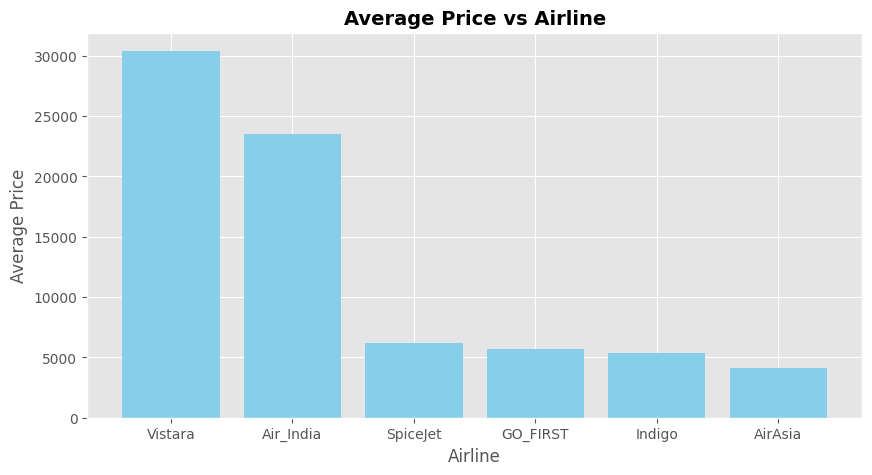

In [ ]:
airline_avg_price = df.groupby('airline')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(airline_avg_price.index, airline_avg_price.values, color='skyblue')
plt.title("Average Price vs Airline", fontsize=14, weight='bold')
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.show()

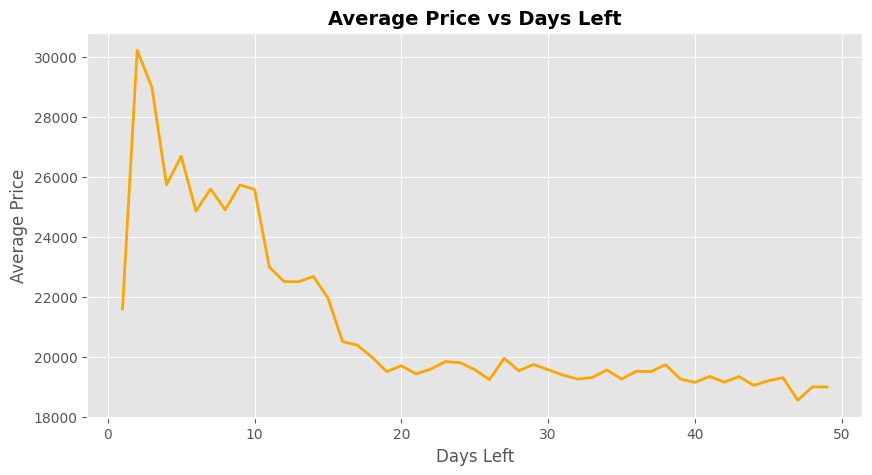

In [ ]:
days_left_avg_price = df.groupby('days_left')['price'].mean()

plt.figure(figsize=(10, 5))
plt.plot(days_left_avg_price.index, days_left_avg_price.values, color='orange', linewidth=2)
plt.title("Average Price vs Days Left", fontsize=14, weight='bold')
plt.xlabel("Days Left", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.show()

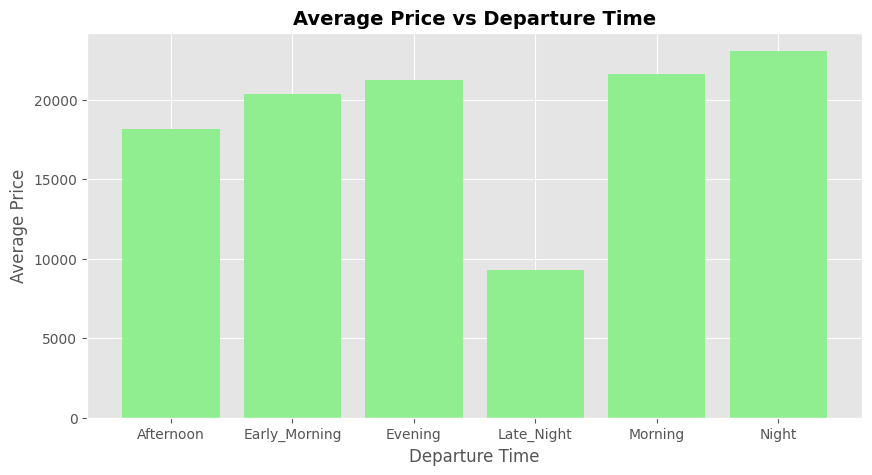

In [ ]:
dep_time_avg_price = df.groupby('departure_time')['price'].mean()

plt.figure(figsize=(10, 5))
plt.bar(dep_time_avg_price.index, dep_time_avg_price.values, color='lightgreen')
plt.title("Average Price vs Departure Time", fontsize=14, weight='bold')
plt.xlabel("Departure Time", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.show()

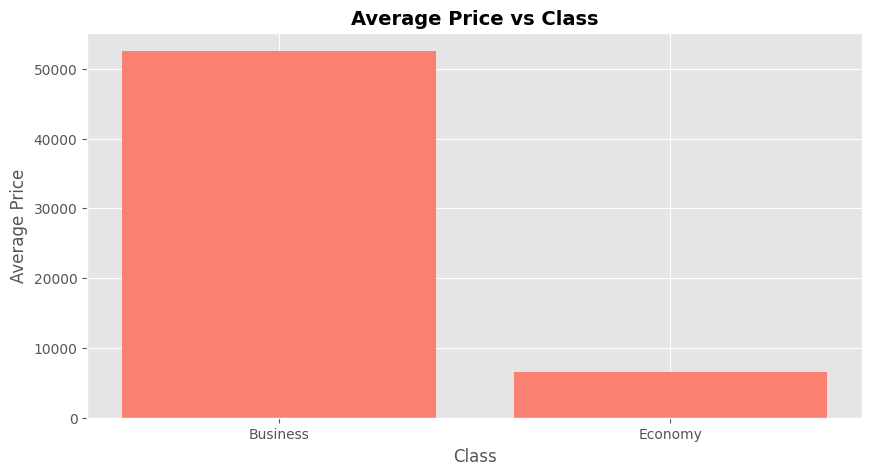

In [ ]:
class_avg_price = df.groupby('class')['price'].mean()

plt.figure(figsize=(10, 5))
plt.bar(class_avg_price.index, class_avg_price.values, color='salmon')
plt.title("Average Price vs Class", fontsize=14, weight='bold')
plt.xlabel("Class", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.show()

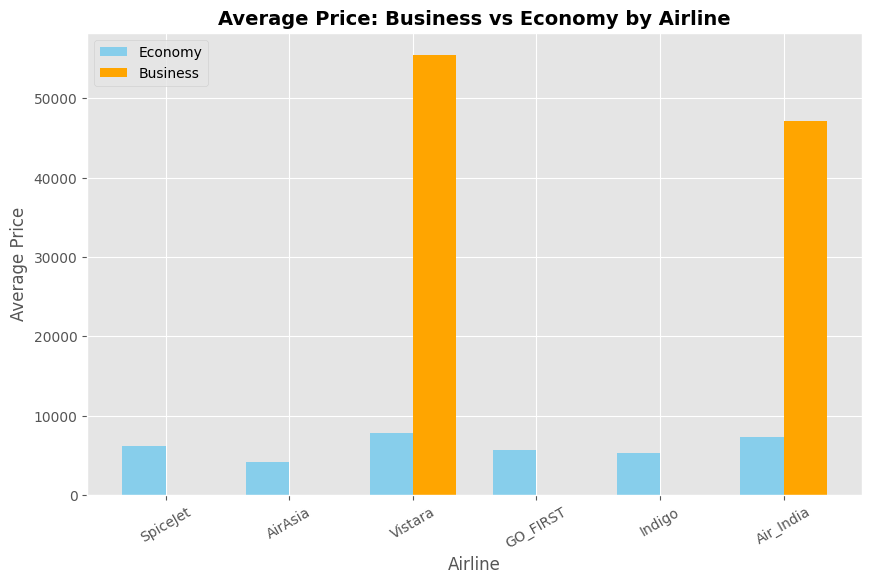

In [ ]:
airline_class_avg = df.groupby(['airline', 'class'])['price'].mean()

airlines = df['airline'].unique().tolist()

economy_avg = [6179, 4091, 7806, 5652, 5324, 7313]
business_avg = [0, 0, 55477, 0, 0, 47131]

w = 0.35
x = np.arange(len(airlines))

plt.figure(figsize=(10, 6))
plt.bar(x - w/2, economy_avg, width=w, label='Economy', color='skyblue')
plt.bar(x + w/2, business_avg, width=w, label='Business', color='orange')

plt.xticks(x, airlines, rotation=30)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Price: Business vs Economy by Airline', fontsize=14, weight='bold')
plt.legend(loc='upper left')
plt.show()

## Preprocessing

In this section, we will prepare the data for modeling

In [ ]:
# Remove unnecessary columns

df.drop(['Unnamed: 0', 'flight'], axis=1, inplace=True)

In [ ]:
# Remove rows where column has missing value

df = df.dropna(subset=['destination_city', 'class', 'duration', 'days_left', 'price'])

In [ ]:
# Encode categorical features

cat_cols = df.select_dtypes(include='object').columns

encoder = LabelEncoder()
for col in cat_cols:
  df[col] = encoder.fit_transform(df[col])

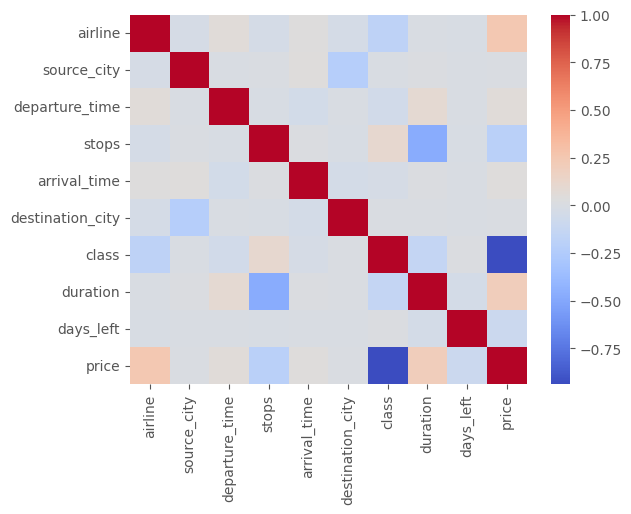

In [ ]:
# Correlation matrix

sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

In [ ]:
# Seperate features and target

X = df.drop('price', axis=1)
y = df['price']

In [ ]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Model Training & Evaluation

In this step, we will train a machine learning model to predict flight ticket prices:

After training the model, we will evaluate them using:

- **Mean Squared Error (MSE)**
- **R² Score**


In [ ]:
# Create and fit the model

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predict test data

y_pred = model.predict(X_test)

In [ ]:
# Evaluation

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
print(f'R2 Score: {r2_score(y_test, y_pred):.2f}')

RMSE: 2716.15
R2 Score: 0.99


## Conclusion

In this project, I developed a machine learning model to predict flight ticket prices based on various features such as airline, class, departure time. After loading, exploring, and preprocessing the dataset, I built and evaluated two models: **Linear Regression** and **Random Forest Regressor**.

The Random Forest model performed extremely well, achieving an **R² score of 0.99** and a **low RMSE**, which indicates high prediction accuracy.

I also explored key business questions through visual analysis:
- Ticket prices vary significantly depending on the **airline** and **travel class**.
- Prices increase noticeably when tickets are booked **just 1 or 2 days before departure**.

Overall, the model can help airlines or travel platforms offer better pricing strategies and customers make informed booking decisions.